In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
planet = untar_data(URLs.PLANET_TINY)
pd.read_csv(planet/'labels.csv').head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [7]:
tmfs   = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data   = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(tmfs, size=128)
        .databunch())

data.train_ds[0]

(Image (3, 128, 128), MultiCategory clear;primary)

In [17]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])

14

In [33]:
lr = 0.01
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,1.063542,0.853275,0.289286,0.540021,00:47
1,0.996592,0.982834,0.233929,0.401776,00:40
2,0.933664,1.132897,0.275000,0.322791,00:41
3,0.878474,1.195036,0.285714,0.313760,00:42
4,0.840130,1.175896,0.292857,0.317558,00:47


In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


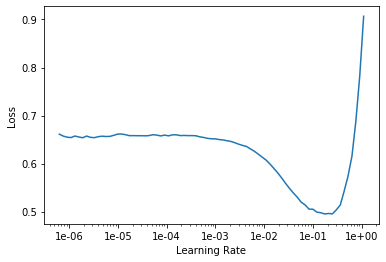

In [36]:
learn.recorder.plot()

In [37]:
learn.save('planet-freeze-lr-001')